## Классификация изображений с использованием Keras модели

In [7]:
# необходимы зависимости
!pip install numpy tensorflow Pillow
!pip install h5py

# Шаг 1: Импорт библиотек

In [1]:
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps
from IPython.display import display

# Отключаем научную нотацию для ясности вывода
np.set_printoptions(suppress=True)

# Шаг 2: Загрузка модели и меток

In [2]:
# Загружаем предобученную модель
model = load_model("keras_Model.h5", compile=False)

# Загружаем метки классов
with open("labels.txt", "r") as file:
    class_names = file.readlines()

# Шаг 3: Подготовка входного изображения

In [3]:
# Определяем форму входного массива для модели
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Загружаем изображение и конвертируем в RGB
image = Image.open("Kit1.jpg").convert("RGB")

# Изменяем размер изображения до 224x224 с обрезкой от центра
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# Преобразуем изображение в массив numpy
image_array = np.asarray(image)

# Нормализуем изображение (масштабируем значения пикселей в диапазон [-1, 1])
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Загружаем нормализованное изображение в массив
data[0] = normalized_image_array

# Шаг 4: Выполнение предсказания

1/1 [==============================] - 0s 37ms/step
Класс: Kotiki
Вероятность: 1.0000


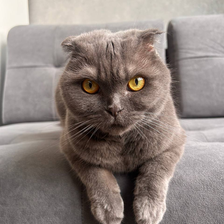

In [7]:
# Выполняем предсказание
prediction = model.predict(data)

# Получаем индекс класса с наибольшей вероятностью
index = np.argmax(prediction)

# Извлекаем имя класса и вероятность
class_name = class_names[index].strip()[2:]  # Удаляем начальный номер индекса
confidence_score = prediction[0][index]

# Выводим результаты
print(f"Класс: {class_name}")
print(f"Вероятность: {confidence_score:.4f}")
display(image)